In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# generators
x = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    image_size=(256, 256) # resizing
)
y = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    image_size=(256, 256) # resizing
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
# The image_dataset_from_directory function reads images from the specified directory and its subdirectories. It considers each subdirectory as a separate class. In your case, assuming the structure is something like:
# /kaggle/input/dogs-vs-cats/train
# ├── cats
# │   ├── cat_image1.jpg
# │   ├── cat_image2.jpg
# │   └── ...
# ├── dogs
# │   ├── dog_image1.jpg
# │   ├── dog_image2.jpg
# │   └── ...
# └── ...
# The function will create a dataset where the images in the 'cats' subdirectory are labeled as 0 (or another integer representing the class), and the images in the 'dogs' subdirectory are labeled as 1 (or another integer).

# The resulting dataset (x) will be a TensorFlow dataset containing pairs of images and corresponding integer labels. For example, if the images are loaded in batches, each batch will consist of a batch of images and a batch of corresponding labels.

In [5]:
# Normalize
def process(image, label):
    image = tf.cast(image/255.,tf.float32)
    return image,label
x = x.map(process)
y = y.map(process)

In [6]:
# CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 30,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [10]:
history = model.fit(x,epochs=10,validation_data=y,callbacks=callback)

Epoch 1/10
625/625 [==============================] - 58s 75ms/step - loss: 1.5209 - accuracy: 0.5512 - val_loss: 0.6611 - val_accuracy: 0.6040
Epoch 2/10
625/625 [==============================] - 35s 56ms/step - loss: 0.6746 - accuracy: 0.6180 - val_loss: 0.6262 - val_accuracy: 0.6528
Epoch 3/10
625/625 [==============================] - 35s 56ms/step - loss: 0.6580 - accuracy: 0.6406 - val_loss: 0.7701 - val_accuracy: 0.5598
Epoch 4/10
625/625 [==============================] - 35s 55ms/step - loss: 0.6116 - accuracy: 0.6653 - val_loss: 0.5839 - val_accuracy: 0.6988
Epoch 5/10
625/625 [==============================] - 35s 56ms/step - loss: 0.6282 - accuracy: 0.6736 - val_loss: 0.5872 - val_accuracy: 0.6828
Epoch 6/10
625/625 [==============================] - 35s 56ms/step - loss: 0.5853 - accuracy: 0.6955 - val_loss: 0.5874 - val_accuracy: 0.6962
Epoch 7/10
625/625 [==============================] - 35s 56ms/step - loss: 0.5760 - accuracy: 0.7059 - val_loss: 0.6108 - val_accuracy:

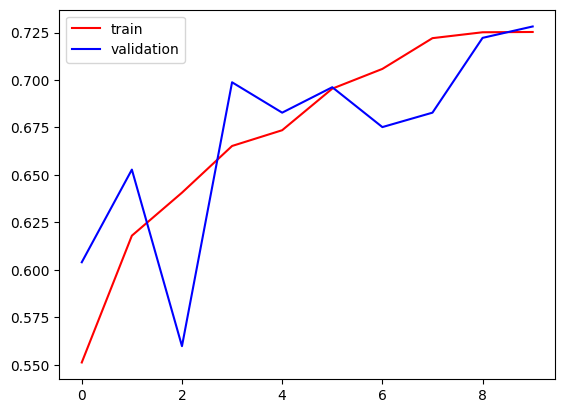

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
# Access the training accuracy
train_accuracy = history.history['accuracy']
print('train_accuracy: ',train_accuracy[9])
# Access the validation accuracy
val_accuracy = history.history['val_accuracy']
print('val_accuracy: ',val_accuracy[9])

train_accuracy:  0.7253000140190125
val_accuracy:  0.7282000184059143
